Projekt z uczenia maszyn

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    classification_report,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

Import/tworzenie danych użytych do badań

In [107]:
# dataset = pd.read_csv("dataset.csv")

X, y = datasets.make_classification(
    n_features=2,  # liczba atrybutów zbioru
    n_samples=4000,  # liczba generowanych wzorców
    n_informative=2,  # liczba atrybutów informatywnych, tych które zawierają informacje przydatne dla klasyfikacji
    n_repeated=0,  # liczba atrybutów powtórzonych, czyli zduplikowanych kolumn
    n_redundant=0,  # liczba atrybutów nadmiarowych
    flip_y=0.08,  # poziom szumu
    random_state=1300,  # ziarno losowości, pozwala na wygenerowanie dokładnie tego samego zbioru w każdym powtórzeniu
    n_classes=2,  # liczba klas problemu
    weights=[0.89, 0.11],
)


# X = dataset.iloc[:, [0, 1]].values
# y = dataset.iloc[:, [2]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Klasyfikacja

In [108]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

clf = SGDClassifier(loss='squared_hinge')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
f1_clf = f1_score(y_test, y_pred_clf)

class_weights = {0: 1, 1: 10}
class_weights_max = {0: 0.5, 1: 100}

wclf = SGDClassifier(loss='squared_hinge', class_weight=class_weights)
wclf.fit(X_train, y_train)
y_pred_wclf = wclf.predict(X_test)
f1_wclf = f1_score(y_test, y_pred_wclf)

wclf_max = SGDClassifier(loss='squared_hinge', class_weight=class_weights_max)
wclf_max.fit(X_train, y_train)

y_pred_wclf_max = wclf_max.predict(X_test)
f1_wclf_max = f1_score(y_test, y_pred_wclf_max)

Prezentacja wyników

Metryka F1:
Brak wag: 0.511
Waga mała: 0.314
Waga duża: 0.265


C:\Users\micha\AppData\Local\Temp\ipykernel_27024\1054390320.py:47: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [disp.surface_.collections[0], disp_mod.surface_.collections[0], disp_mod_max.surface_.collections[0]],


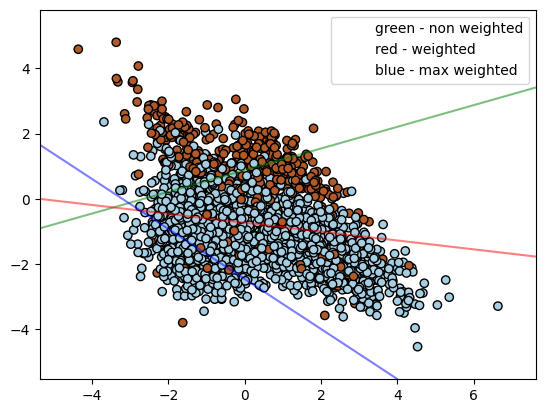

In [109]:
print("Metryka F1:")
print("Brak wag:", round(f1_clf, 3))
print("Waga mała:", round(f1_wclf, 3))
print("Waga duża:", round(f1_wclf_max, 3))




plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="green",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

disp_mod = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="red",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

disp_mod_max = DecisionBoundaryDisplay.from_estimator(
    wclf_max,
    X,
    plot_method="contour",
    colors="blue",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], disp_mod.surface_.collections[0], disp_mod_max.surface_.collections[0]],
    ["green - non weighted", "red - weighted", "blue - max weighted"],
    loc="upper right",
)

plt.show()



Raport

In [ ]:
report_clf = classification_report(y_test, y_pred_clf)
print("Classification Report CLF:")
print(report_clf)

report_wclf = classification_report(y_test, y_pred_wclf)
print("Classification Report WCLF:")
print(report_wclf)

report_wclf_max = classification_report(y_test, y_pred_wclf_max)
print("Classification Report MAX WCLF:")
print(report_wclf_max)